In [1]:
% pylab inline 
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv("B:/Case studies/Student Hunt/train.csv")
test = pd.read_csv("B:/Case studies/Student Hunt/test.csv")

# VISUALIZATION

In [3]:
# to check data
train.head()

,ID,Count
0,2011100100,135
1,2011100101,96
2,2011100102,111
3,2011100103,102
4,2011100104,54


In [4]:
test.head()

,ID,Count
0,2013040100,NaN
1,2013040101,NaN
2,2013040102,NaN
3,2013040103,NaN
4,2013040104,NaN


In [5]:
# to understand the general statistics of data
train.describe()

,ID,Count
count,1.315200e+04,13152.000000
mean,2.012063e+09,236.008668
std,5.511080e+05,126.936308
min,2.011100e+09,3.000000
25%,2.012021e+09,141.000000
50%,2.012067e+09,210.000000
75%,2.012111e+09,309.000000
max,2.013033e+09,891.000000


In [6]:
test.describe()

,ID,Count
count,2.928000e+03,0.0
mean,2.013057e+09,NaN
std,1.122773e+04,NaN
min,2.013040e+09,NaN
25%,2.013050e+09,NaN
50%,2.013057e+09,NaN
75%,2.013070e+09,NaN
max,2.013073e+09,NaN


In [7]:
# data type and dimension of features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13152 entries, 0 to 13151
Data columns (total 2 columns):
ID       13152 non-null int64
Count    13152 non-null int64
dtypes: int64(2)
memory usage: 205.6 KB


In [8]:
#  for checking null values
train.isnull().sum()

ID       0
Count    0
dtype: int64

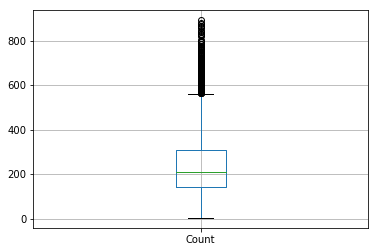

In [9]:
train.boxplot(column='Count')

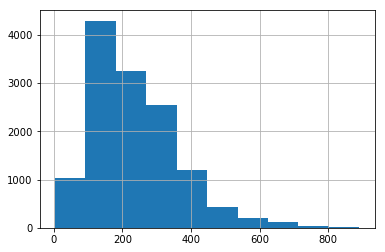

In [10]:
train['Count'].hist(bins=10)

In [11]:
Q1 = train['Count'].quantile(0.25)
Q3 = train['Count'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
mean_value = train.Count.mean()


lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

def imputer(value):
    if value < lower_limit or value > upper_limit:
        return mean_value
    else:
        return value

result = train.Count.apply(imputer)

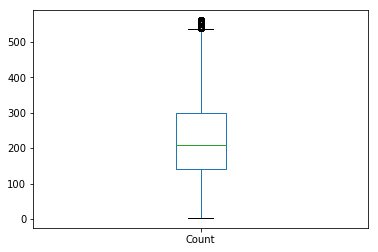

In [13]:
result.plot(kind='box')

#The above result is almost free from outliers, but it might have lost the important information. 

In [14]:
train.ID.dtype

dtype('int64')

In [15]:
# Splitting ID in to number of features
train['ID1'] = train['ID'].astype(str)
train['Year'] = train['ID1'].str[0:4]
train['Month'] = train['ID1'].str[4:6]
train['Day'] = train['ID1'].str[6:8] 
train['Time'] = train['ID1'].str[8:10] 

In [16]:
# splitting ID int to no of feature
test['ID1'] = test['ID'].astype(str)
test['Year'] = test['ID1'].str[0:4]
test['Month'] = test['ID1'].str[4:6]
test['Day'] = test['ID1'].str[6:8] 
test['Time'] = test['ID1'].str[8:10] 

In [17]:
train.head()


,ID,Count,ID1,Year,Month,Day,Time
0,2011100100,135,2011100100,2011,10,01,00
1,2011100101,96,2011100101,2011,10,01,01
2,2011100102,111,2011100102,2011,10,01,02
3,2011100103,102,2011100103,2011,10,01,03
4,2011100104,54,2011100104,2011,10,01,04


In [18]:
test.head()

,ID,Count,ID1,Year,Month,Day,Time
0,2013040100,NaN,2013040100,2013,04,01,00
1,2013040101,NaN,2013040101,2013,04,01,01
2,2013040102,NaN,2013040102,2013,04,01,02
3,2013040103,NaN,2013040103,2013,04,01,03
4,2013040104,NaN,2013040104,2013,04,01,04


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13152 entries, 0 to 13151
Data columns (total 7 columns):
ID       13152 non-null int64
Count    13152 non-null int64
ID1      13152 non-null object
Year     13152 non-null object
Month    13152 non-null object
Day      13152 non-null object
Time     13152 non-null object
dtypes: int64(2), object(5)
memory usage: 719.3+ KB


In [20]:
# New feature DATE
train['date'] = train['Year']+'-'+ train['Month'] + '-' + train['Day']
test['date'] = test['Year']+'-'+ test['Month'] + '-' + test['Day']

In [21]:
# converting date in to datetime type
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [22]:
# To determine day of week and week number
train['day-of-week'] = train['date'].dt.weekday_name
test['day-of-week'] = test['date'].dt.weekday_name
train['weekno'] = train['date'].dt.week
test['weekno'] = test['date'].dt.week

In [23]:
train.head()

,ID,Count,ID1,Year,Month,Day,Time,date,day-of-week,weekno
0,2011100100,135,2011100100,2011,10,01,00,2011-10-01,Saturday,39
1,2011100101,96,2011100101,2011,10,01,01,2011-10-01,Saturday,39
2,2011100102,111,2011100102,2011,10,01,02,2011-10-01,Saturday,39
3,2011100103,102,2011100103,2011,10,01,03,2011-10-01,Saturday,39
4,2011100104,54,2011100104,2011,10,01,04,2011-10-01,Saturday,39


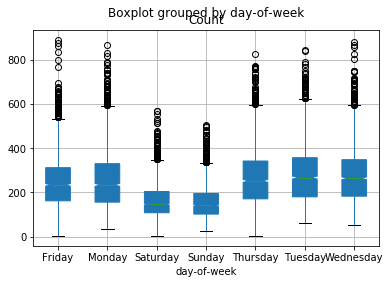

In [24]:
bplot = train.boxplot(column = 'Count',by = 'day-of-week',notch = True, patch_artist=True)

In [25]:
train.shape

(13152, 10)

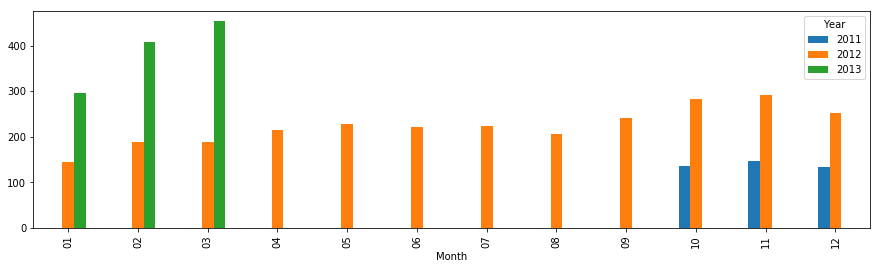

In [26]:
temp = train.pivot_table(values = 'Count',index = 'Month',columns='Year',aggfunc='mean')
temp.plot(kind='bar',sharex= True, figsize= (15,4))

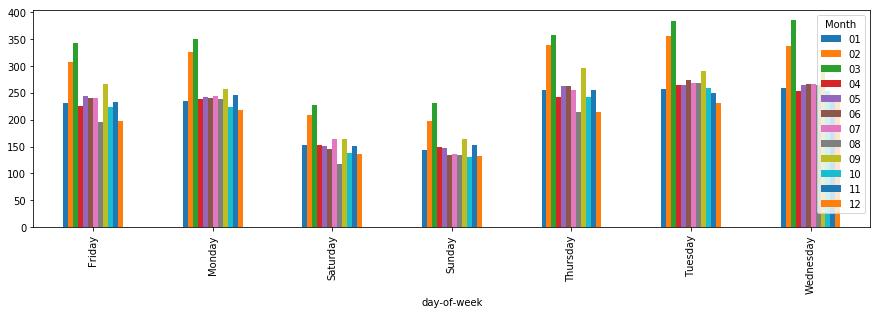

In [27]:
temp = train.pivot_table(values = 'Count',index = 'day-of-week',columns='Month',aggfunc='mean')
temp.plot(kind='bar',sharex= True, figsize= (15,4))

It can be seen From the above two outputs on saturday and sunday, The Number of count is much lower as compared to other week days.

In [29]:
# Label Encoding
train['day-of-week'] = train['day-of-week'].astype('category')
train['day-of-week'] = train['day-of-week'].cat.codes
test['day-of-week'] = test['day-of-week'].astype('category')
test['day-of-week'] = test['day-of-week'].cat.codes

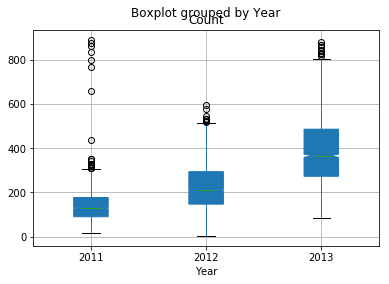

In [33]:
train.boxplot(column = 'Count',by = 'Year', notch = True , patch_artist = True)

In [34]:
train['Year'] = train['Year'].astype('int')
test['Year'] = test['Year'].astype('int')

In [35]:
train['old'] = 2014 - train['Year']
test['old'] = 2014 - test['Year']

In [36]:
trainf = train[['old','Month','Time','day-of-week','weekno']]
target = train[['Count']]
testf = test[['old','Month','Time','day-of-week','weekno']]

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(trainf,target,test_size = 0.25, random_state = 42)

In [38]:
# importing random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
Regressor=RandomForestRegressor(n_estimators= 300 ,max_features=4, min_samples_leaf=5,max_depth = 12, oob_score=True)
Regressor.fit(x_train,y_train)
predicted= Regressor.predict(x_test)
rms = sqrt(mean_squared_error(y_test, predicted))
rms

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


38.26218195588898

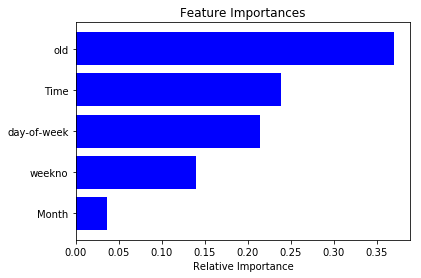

In [39]:
features = x_train.columns
importances = Regressor.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
print(Regressor.feature_importances_)

[ 0.37028237  0.03659578  0.23871742  0.21449929  0.13990514]


In [41]:
# Final Modelling
X = train[['old','Month','Time','day-of-week','weekno']]
Y = train[['Count']]
Xtest = test[['old','Month','Time','day-of-week','weekno']]
from sklearn.ensemble import RandomForestRegressor
Regressor=RandomForestRegressor(n_estimators= 300 ,max_features=4, min_samples_leaf=5,max_depth = 12,oob_score=True)
# fitting training dataset
Regressor.fit(X,Y)
# prediction
predicted2= Regressor.predict(Xtest)
predicted2

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([ 412.55051767,  397.94984012,  373.11856381, ...,  744.99841181,
        670.36591175,  663.60651149])

In [42]:
print(Regressor.feature_importances_)

[ 0.36374025  0.03594597  0.23660604  0.21865922  0.14504852]


In [43]:
predicted2=np.around(predicted2)

In [ ]:
# Make submission file and submit
submission = pd.DataFrame({'Count':predicted2,'ID':test['ID']},columns=['ID','Count'])
submission.to_csv('av15.csv', index = False)